In [13]:
import os
import numpy as np
import pandas as pd
import requests
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from PIL import UnidentifiedImageError


In [14]:
 
model = load_model('leaf_classifier_2.h5')

 

In [15]:
 
df = pd.read_csv('leaf.csv')

In [16]:
print(df.columns)


Index(['plant_name ', 'scientific_name', 'features', 'description'], dtype='object')


In [18]:
 
plant_names = df['plant_name '].values   
scientific_names = df['scientific_name'].values
features = df['features'].values
 


In [19]:
class_indices = {name: idx for idx, name in enumerate(plant_names)}
plant_uses = {name: feature for name, feature in zip(plant_names, features)}

In [20]:

image_dir = 'Medicinal Leaf Dataset/Segmented Medicinal Leaf Images'
os.makedirs(image_dir, exist_ok=True)

In [21]:
 
for url in image_urls:
    image_name = os.path.join(image_dir, url.split('/')[-1])
    if not os.path.exists(image_name):
        response = requests.get(url)
        if response.status_code == 200:
            with open(image_name, 'wb') as f:
                f.write(response.content)


In [22]:
 
def preprocess_image(image_path, target_size=(128, 128)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalize the image
        return img_array
    except UnidentifiedImageError:
        print("Error: The image at the specified path could not be identified.")
        return None


In [23]:
 
def predict_leaf_name(image_path, model, class_indices):
    processed_image = preprocess_image(image_path)
    if processed_image is None:
        return None, None
    prediction = model.predict(processed_image)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}  # Invert the class indices
    predicted_class_label = class_labels[predicted_class_index]
    predicted_uses = plant_uses.get(predicted_class_label, "No use information available.")
    return predicted_class_label, predicted_uses

In [24]:
 
def plot_image_with_prediction_and_uses(image_path, predicted_label, uses):
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_label}\nUses: {uses}')
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


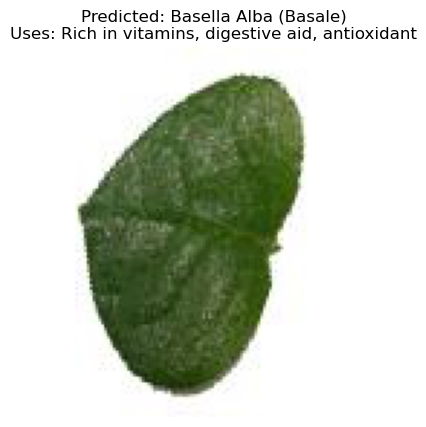

In [25]:
 
image_path = 'dataset_5/validation/Basella Alba (Basale)/aug_0_1613.jpg'  # Specify the local path to the image
predicted_label, predicted_uses = predict_leaf_name(image_path, model, class_indices)
if predicted_label and predicted_uses:
    plot_image_with_prediction_and_uses(image_path, predicted_label, predicted_uses)